#### Load Data & Necessary Libraries

In [3]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('../../dsi_team_22/data/raw/pharma.csv')

In [ ]:
# Define the range of years and get unique country codes
years = np.arange(1970, 2017)
countries = df['LOCATION'].unique()

# Create a reference DataFrame with all combinations of countries and years
reference_df = pd.MultiIndex.from_product([countries, years], names=['LOCATION', 'TIME']).to_frame(index=False)

# Merge the reference DataFrame with the original DataFrame to find missing combinations
merged_df = reference_df.merge(df, on=['LOCATION', 'TIME'], how='left', indicator=True)

# Identify rows where the merge indicator shows that the row is missing in the original DataFrame
missing_rows = merged_df[merged_df['_merge'] == 'left_only']

# Display the missing country-year combinations
missing_combinations = missing_rows[['LOCATION', 'TIME']]
print("Missing country-year combinations:")
print(missing_combinations)

# Save the missing combinations to a CSV file
missing_combinations.to_csv('missing_values.csv', index=False)

In [5]:
df_missing = pd.read_csv('../../dsi_team_22/data/processed/missing_values.csv')
df_missing

,LOCATION,TIME
0,AUS,1970
1,AUS,2015
2,AUS,2016
3,AUT,1970
4,AUT,1971
...,...,...
651,RUS,2011
652,RUS,2012
653,RUS,2013
654,RUS,2014


## Observations of Each Country by Year

/var/folders/67/90hxk3wd4v9d4cvjls01q60h0000gp/T/ipykernel_9675/15078039.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table = pivot_table.applymap(lambda x: 1 if x > 0 else 0)


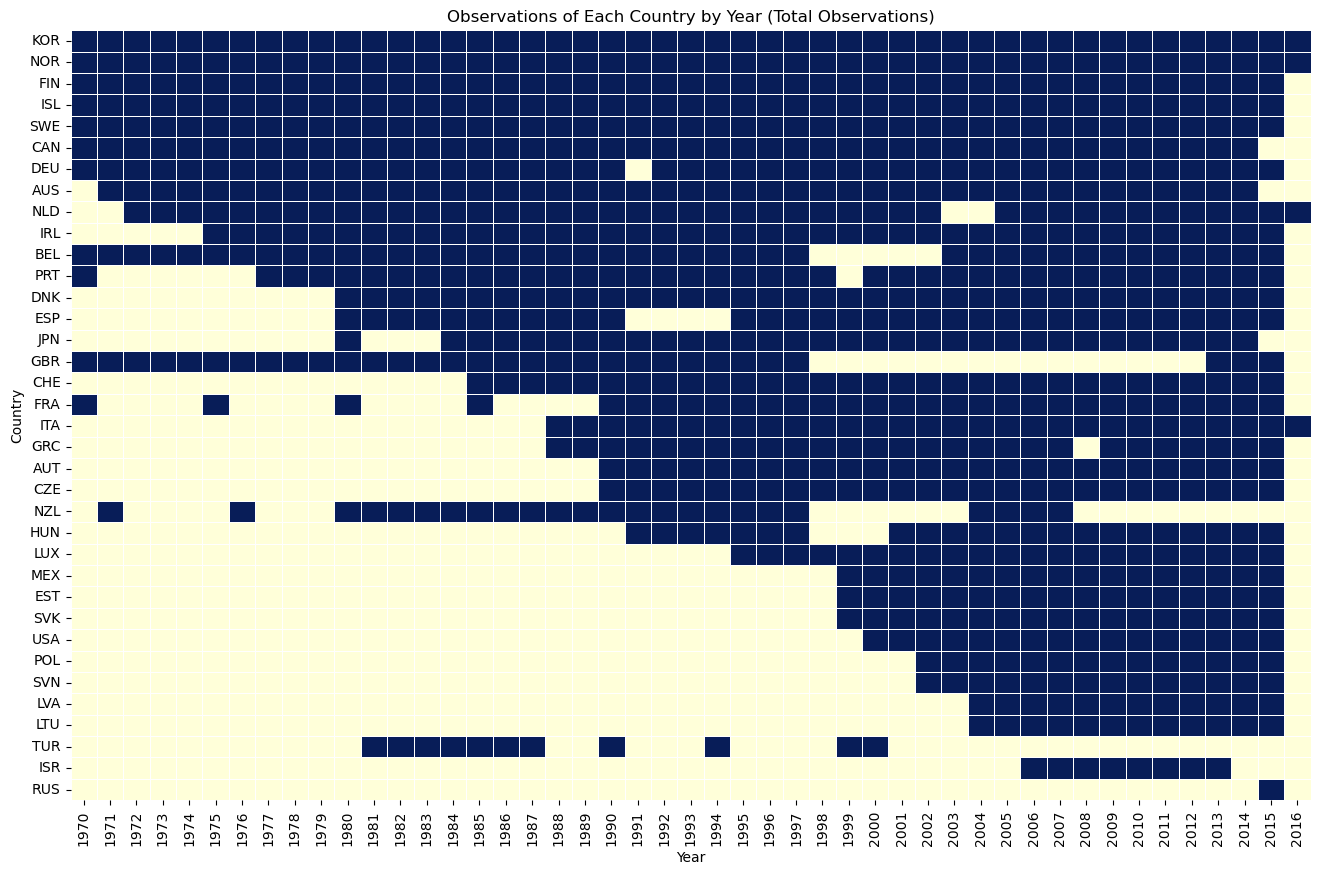

In [9]:
# Create a pivot table with countries as rows and years as columns
pivot_table = df.pivot_table(index='LOCATION', columns='TIME', aggfunc='size', fill_value=0)

# Convert the pivot table to a binary format (presence or absence of observation)
pivot_table = pivot_table.applymap(lambda x: 1 if x > 0 else 0)

# Count the number of observations per country
observation_counts = pivot_table.sum(axis=1)

# Sort the countries by the number of observations
sorted_countries = observation_counts.sort_values(ascending=False).index

# Reorder the pivot table based on the sorted countries
pivot_table_sorted = pivot_table.loc[sorted_countries]

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table_sorted, cmap="YlGnBu", cbar=False, linewidths=.5)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Country')
plt.title('Observations of Each Country by Year (Total Observations)')

# Display the heatmap
plt.show()


## Table of Missing Values

| country code | country name    | # of observations | # of missing values | % missing  |
|:------------:|:---------------:|:-----------------:|:-------------------:|-----------:|
| RUS          | Russia          | 1                 | 46                  | 97.87%     |
| ISR          | Israel          | 8                 | 39                  | 82.98%     |
| TUR          | Turkey          | 11                | 36                  | 76.60%     |
| LTU          | Lithuania       | 12                | 35                  | 74.47%     |
| LVA          | Latvia          | 12                | 35                  | 74.47%     |
| SVN          | Slovenia        | 14                | 33                  | 70.21%     |
| POL          | Poland          | 14                | 33                  | 70.21%     |
| USA          | United States   | 16                | 31                  | 65.96%     |
| EST          | Estonia         | 17                | 30                  | 63.83%     |
| SVK          | Slovakia        | 17                | 30                  | 63.83%     |
| MEX          | Mexico          | 17                | 30                  | 63.83%     |
| LUX          | Luxembourg      | 21                | 26                  | 55.32%     |
| HUN          | Hungary         | 22                | 25                  | 53.19%     |
| NZL          | New Zealand     | 24                | 23                  | 48.94%     |
| CZE          | Czech Republic  | 26                | 21                  | 44.68%     |
| AUT          | Austria         | 26                | 21                  | 44.68%     |
| GRC          | Greece          | 27                | 20                  | 42.55%     |
| ITA          | Italy           | 29                | 18                  | 38.30%     |
| FRA          | France          | 30                | 17                  | 36.17%     |
| CHE          | Switzerland     | 31                | 16                  | 34.04%     |
| GBR          | United Kingdom  | 31                | 16                  | 34.04%     |
| JPN          | Japan           | 32                | 15                  | 31.91%     |
| ESP          | Spain           | 32                | 15                  | 31.91%     |
| DNK          | Denmark         | 36                | 11                  | 23.40%     |
| PRT          | Portugal        | 39                | 8                   | 17.02%     |
| IRL          | Ireland         | 41                | 6                   | 12.77%     |
| BEL          | Belgium         | 41                | 6                   | 12.77%     |
| NLD          | Netherlands     | 43                | 4                   | 8.51%      |
| AUS          | Australia       | 44                | 3                   | 6.38%      |
| DEU          | Germany         | 45                | 2                   | 4.26%      |
| CAN          | Canada          | 45                | 2                   | 4.26%      |
| SWE          | Sweden          | 46                | 1                   | 2.13%      |
| ISL          | Iceland         | 46                | 1                   | 2.13%      |
| FIN          | Finland         | 46                | 1                   | 2.13%      |


#### Supporting Python Code:

In [ ]:
# Count the number of missing years for each country
missing_year_count = df_missing['LOCATION'].value_counts().sort_values(ascending=True)

print(missing_year_count)

## Exploring Missing Values

#### Total Missing Values
| Years Range | # of Years | # of missing values |
|:-----------:|:----------:|:-------------------:|
| 1970 to 2016 | 47 | 656 |

#### Missing Values by Decade
| Years Range | # of Years | # of missing values |
|:-----------:|:----------:|:-------------------:|
| 1970_1979   | 10         | 240                 |
| 1980_1989   | 10         | 175                 |
| 1990_1999   | 10         | 124                 |
| 2000_2009   | 10         | 60                  |
| 2010_2016   | 7          | 57                  |

#### Supporting Python Code:

In [7]:
# Count the number of missing values (row count)
total_missing_count = len(df_missing)
print("Total Missing Values Count:", total_missing_count)

# Filter the DataFrame for the specified year range
df_1970_1979 = df_missing[(df_missing['TIME'] >= 1970) & (df_missing['TIME'] <= 1979)]
df_1980_1989 = df_missing[(df_missing['TIME'] >= 1980) & (df_missing['TIME'] <= 1989)]
df_1990_1999 = df_missing[(df_missing['TIME'] >= 1990) & (df_missing['TIME'] <= 1999)]
df_2000_2009 = df_missing[(df_missing['TIME'] >= 2000) & (df_missing['TIME'] <= 2009)]
df_2010_2016 = df_missing[(df_missing['TIME'] >= 2010) & (df_missing['TIME'] <= 2016)]

# Count missing values in each column within these filtered DataFrames
missing_count_1970_1979 = len(df_1970_1979)
missing_count_1980_1989 = len(df_1980_1989)
missing_count_1990_1999 = len(df_1990_1999)
missing_count_2000_2009 = len(df_2000_2009)
missing_count_2010_2016 = len(df_2010_2016)

print("Missing Value Count between 1970_1979 is:", missing_count_1970_1979)
print("Missing Value Count between 1980_1989 is:", missing_count_1980_1989)
print("Missing Value Count between 1990_1999 is:", missing_count_1990_1999)
print("Missing Value Count between 2000_2009 is:", missing_count_2000_2009)
print("Missing Value Count between 2010_2016 is:", missing_count_2010_2016)

Total Missing Values Count: 656
Missing Value Count between 1970_1979 is: 240
Missing Value Count between 1980_1989 is: 175
Missing Value Count between 1990_1999 is: 124
Missing Value Count between 2000_2009 is: 60
Missing Value Count between 2010_2016 is: 57


#### Missing Values by Filtered Choice
| Years Range | # of Years | # of missing values |
|:-----------:|:----------:|:-------------------:|
| 1990_2015   | 27         | 209                 |
| 1999_2015   | 17         | 97                  |
| 2000_2014   | 15         | 79                  |

#### Supporting Python Code:

In [ ]:
# Filter the DataFrame for the specified year range
df_1990_2015 = df_missing[(df_missing['TIME'] >= 1990) & (df_missing['TIME'] <= 2015)]

# Filter the DataFrame for the specified year range
df_1999_2015 = df_missing[(df_missing['TIME'] >= 1999) & (df_missing['TIME'] <= 2015)]

# Filter the DataFrame for the specified year range
df_2000_2014 = df_missing[(df_missing['TIME'] >= 2000) & (df_missing['TIME'] <= 2014)]

# Count missing values in each column within this filtered DataFrame
missing_count_1990_2015 = len(df_1990_2015)

# Count missing values in each column within this filtered DataFrame
missing_count_1999_2015 = len(df_1999_2015)

# Count missing values in each column within this filtered DataFrame
missing_count_2000_2014 = len(df_2000_2014)

print("Missing Value Count between 1990-2015 is:", missing_count_1990_2015)
print("Missing Value Count between 1999-2015 is:", missing_count_1999_2015)
print("Missing Value Count between 2000-2014 is:", missing_count_2000_2014)


Missing Value Count between 1990-2015 is: 209
Missing Value Count between 1999-2015 is: 97
Missing Value Count between 2000-2014 is: 79


/var/folders/67/90hxk3wd4v9d4cvjls01q60h0000gp/T/ipykernel_4225/2816251442.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table = pivot_table.applymap(lambda x: 1 if x > 0 else 0)


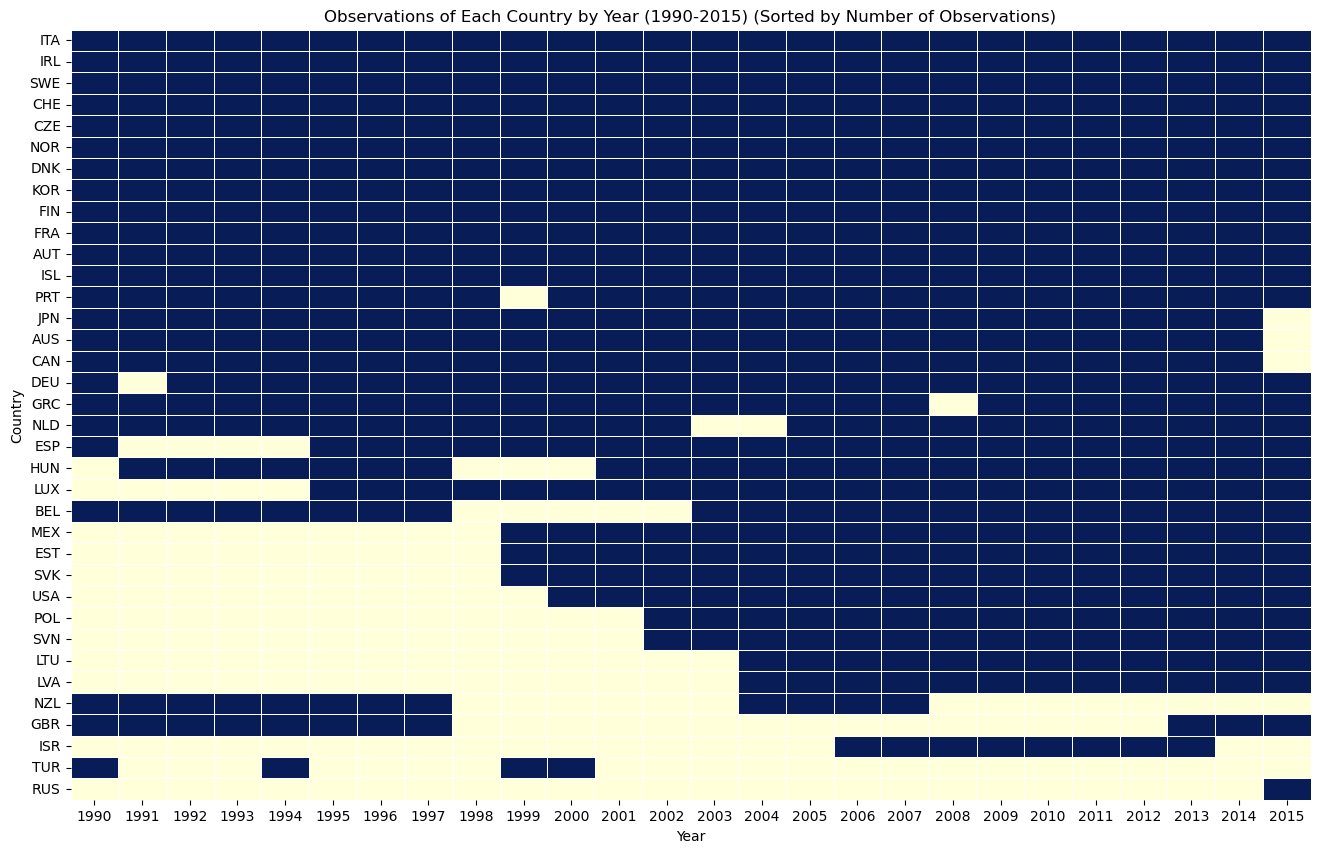

In [20]:
# Filter the DataFrame to include only the years 1991 to 2015
df_filtered = df[(df['TIME'] >= 1990) & (df['TIME'] <= 2015)]

# Create a pivot table with countries as rows and years as columns
pivot_table = df_filtered.pivot_table(index='LOCATION', columns='TIME', aggfunc='size', fill_value=0)

# Convert the pivot table to a binary format (presence or absence of observation)
pivot_table = pivot_table.applymap(lambda x: 1 if x > 0 else 0)

# Count the number of observations per country
observation_counts = pivot_table.sum(axis=1)

# Sort the countries by the number of observations
sorted_countries = observation_counts.sort_values(ascending=False).index

# Reorder the pivot table based on the sorted countries
pivot_table_sorted = pivot_table.loc[sorted_countries]

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table_sorted, cmap="YlGnBu", cbar=False, linewidths=.5)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Country')
plt.title('Observations of Each Country by Year (1990-2015) (Sorted by Number of Observations)')

# Display the heatmap
plt.show()

#### Missing Values by Filtered Choice (Drop 30)
| Years Range | # of Years | # of missing values |
|:-----------:|:----------:|:-------------------:|
| 1990_2015   | 27         | 55                 |
| 1999_2015   | 17         | 40                  |
| 2000_2014   | 15         | 31                  |

#### Supporting Python Code:

In [15]:
df_missing_30 = pd.read_csv('../../dsi_team_22/data/processed/missing_values_filtered_30.csv')

In [16]:
# Filter the DataFrame for the specified year range
df_1990_2015_30 = df_missing_30[(df_missing_30['TIME'] >= 1990) & (df_missing_30['TIME'] <= 2015)]

# Filter the DataFrame for the specified year range
df_1999_2015_30 = df_missing_30[(df_missing_30['TIME'] >= 1999) & (df_missing_30['TIME'] <= 2015)]

# Filter the DataFrame for the specified year range
df_2000_2014_30 = df_missing_30[(df_missing_30['TIME'] >= 2000) & (df_missing_30['TIME'] <= 2014)]

# Count missing values in each column within this filtered DataFrame
missing_count_1990_2015_30 = len(df_1990_2015_30)

# Count missing values in each column within this filtered DataFrame
missing_count_1999_2015_30 = len(df_1999_2015_30)

# Count missing values in each column within this filtered DataFrame
missing_count_2000_2014_30 = len(df_2000_2014_30)

print("Missing Value Count between 1990-2015 is:", missing_count_1990_2015_30)
print("Missing Value Count between 1999-2015 is:", missing_count_1999_2015_30)
print("Missing Value Count between 2000-2014 is:", missing_count_2000_2014_30)

Missing Value Count between 1990-2015 is: 55
Missing Value Count between 1999-2015 is: 40
Missing Value Count between 2000-2014 is: 31


## Dropping Countries with 30 or more missing observations.

In [18]:
# Create a copy of the dataset
df_copy = df.copy()

# Step 3: Drop the specified countries
countries_to_drop = ["MEX", "SVK", "EST", "USA", "POL", "SVN", "LVA", "LTU", "TUR", "ISR", "RUS"]
df_drop_30 = df_copy[~df_copy['LOCATION'].isin(countries_to_drop)]
df_drop_30

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,NaN,462.11
1,AUS,1972,15.091,0.686,36.056,NaN,475.11
2,AUS,1973,15.117,0.681,39.871,NaN,533.47
3,AUS,1974,14.771,0.755,47.559,NaN,652.65
4,AUS,1975,11.849,0.682,47.561,NaN,660.76
...,...,...,...,...,...,...,...
951,GBR,1996,16.546,0.935,201.152,NaN,11700.40
952,GBR,1997,16.925,0.935,212.206,B,12375.21
953,GBR,2013,12.185,1.201,468.513,B,30044.91
954,GBR,2014,12.049,1.181,480.649,NaN,31056.25


/var/folders/67/90hxk3wd4v9d4cvjls01q60h0000gp/T/ipykernel_4225/2522584861.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_drop_30[(df_drop_30['TIME'] >= 1990) & (df['TIME'] <= 2015)]
/var/folders/67/90hxk3wd4v9d4cvjls01q60h0000gp/T/ipykernel_4225/2522584861.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table = pivot_table.applymap(lambda x: 1 if x > 0 else 0)


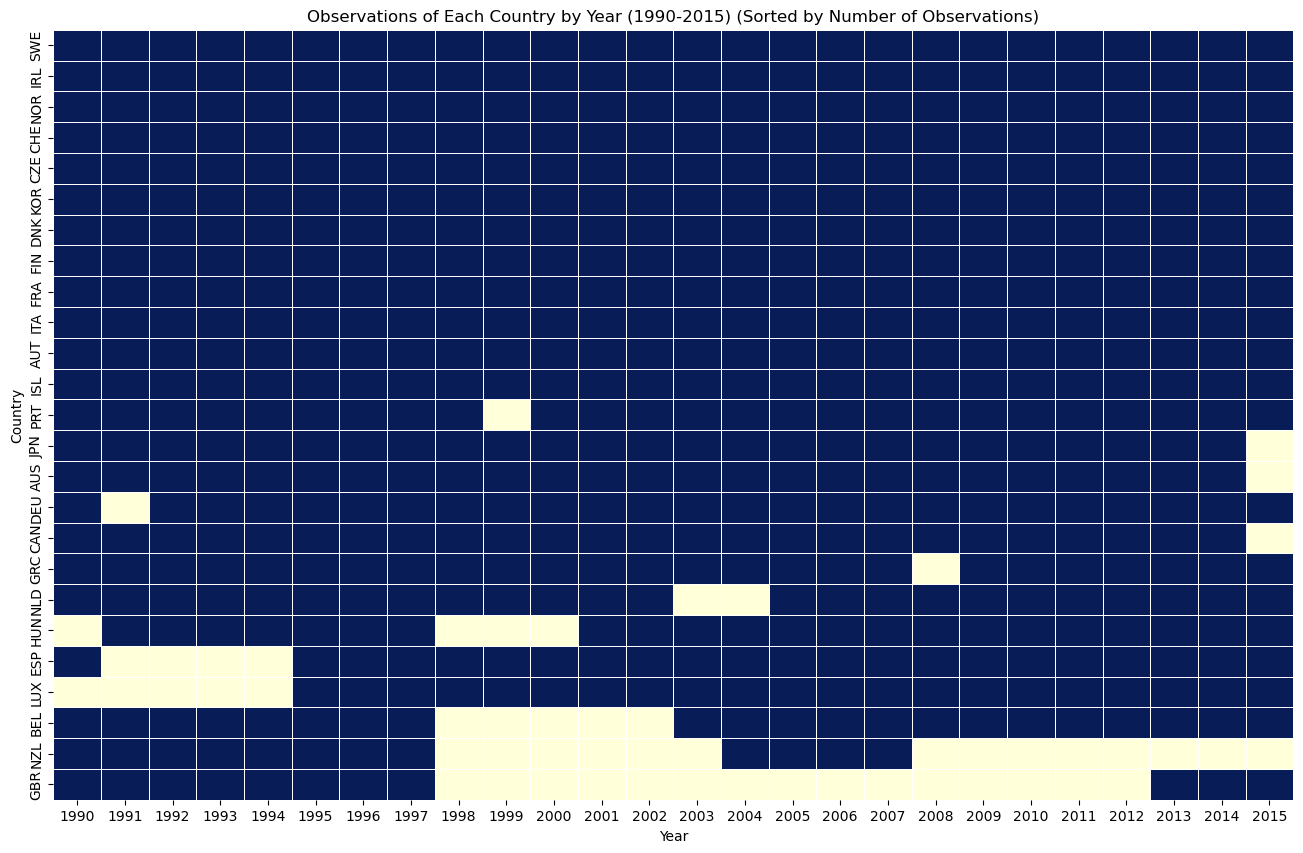

In [9]:
# Filter the DataFrame to include only the years 1991 to 2015
df_filtered = df_drop_30[(df_drop_30['TIME'] >= 1990) & (df['TIME'] <= 2015)]

# Create a pivot table with countries as rows and years as columns
pivot_table = df_filtered.pivot_table(index='LOCATION', columns='TIME', aggfunc='size', fill_value=0)

# Convert the pivot table to a binary format (presence or absence of observation)
pivot_table = pivot_table.applymap(lambda x: 1 if x > 0 else 0)

# Count the number of observations per country
observation_counts = pivot_table.sum(axis=1)

# Sort the countries by the number of observations
sorted_countries = observation_counts.sort_values(ascending=False).index

# Reorder the pivot table based on the sorted countries
pivot_table_sorted = pivot_table.loc[sorted_countries]

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table_sorted, cmap="YlGnBu", cbar=False, linewidths=.5)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Country')
plt.title('Observations of Each Country by Year (1990-2015) (Sorted by Number of Observations)')

# Display the heatmap
plt.show()